# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

df = pd.read_csv("nhanes_2015_2016.csv")
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [2]:
df["DMDMARTLx"] = df.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married", 
                                       6: "Living with partner", 77.0: "Refused"})
df.DMDMARTLx.value_counts()

Married                2780
Never married          1004
Divorced                579
Living with partner     527
Widowed                 396
Separated               186
Refused                   2
Name: DMDMARTLx, dtype: int64

In [3]:
df["DMDMARTLx"] = df.DMDMARTLx.fillna("Missing")
x = df.DMDMARTLx.value_counts()
x.sum()

5735

In [25]:
df["RIAGENDRx"] = df.RIAGENDR.replace({1: "Male", 2: "Female"})

In [5]:
df.RIAGENDRx.value_counts()

Female    2976
Male      2759
Name: RIAGENDRx, dtype: int64

In [6]:
df["agegrp"] = pd.cut(df.RIDAGEYR,[30,40])
df.groupby("agegrp")["DMDMARTLx"].value_counts()

agegrp    DMDMARTLx          
(30, 40]  Married                516
          Never married          186
          Living with partner    129
          Divorced                67
          Separated               29
          Widowed                  4
          Refused                  1
Name: DMDMARTLx, dtype: int64

__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

__Q1c.__ Repeat part b for the men.

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

In [7]:
# insert your code here
x = df[df.RIAGENDRx == "Female"]
x["agegrp2"] = pd.cut(df.RIDAGEYR, [10,20, 30, 40, 50, 60, 70, 80])
dx = x.groupby(["agegrp2"])["DMDMARTLx"].value_counts().unstack()
dx = dx.apply(lambda y: y/y.sum(), axis=0)
print(dx.to_string(float_format="%.2f"))

DMDMARTLx  Divorced  Living with partner  Married  Missing  Never married  Refused  Separated  Widowed
agegrp2                                                                                               
(10, 20]        NaN                 0.03     0.00     1.00           0.06      NaN        NaN      NaN
(20, 30]       0.03                 0.40     0.12      NaN           0.44      NaN       0.09      NaN
(30, 40]       0.12                 0.22     0.20      NaN           0.19      NaN       0.14     0.01
(40, 50]       0.20                 0.14     0.22      NaN           0.12      NaN       0.28     0.04
(50, 60]       0.24                 0.12     0.20      NaN           0.08     1.00       0.23     0.09
(60, 70]       0.24                 0.07     0.16      NaN           0.07      NaN       0.19     0.22
(70, 80]       0.17                 0.01     0.10      NaN           0.04      NaN       0.07     0.64


__Q2b.__ Repeat the construction for males.

In [8]:
x = df[df.RIAGENDRx == "Male"]
x["agegrp2"] = pd.cut(df.RIDAGEYR, [10,20, 30, 40, 50, 60, 70, 80])
dx = x.groupby(["agegrp2"])["DMDMARTLx"].value_counts().unstack()
dx = dx.apply(lambda y: y/y.sum(), axis=0)
print(dx.to_string(float_format="%.2f"))

DMDMARTLx  Divorced  Living with partner  Married  Missing  Never married  Refused  Separated  Widowed
agegrp2                                                                                               
(10, 20]        NaN                 0.01     0.00     1.00           0.07      NaN        NaN      NaN
(20, 30]       0.01                 0.35     0.07      NaN           0.47      NaN       0.10     0.02
(30, 40]       0.10                 0.27     0.17      NaN           0.18     1.00       0.18     0.02
(40, 50]       0.15                 0.12     0.19      NaN           0.08      NaN       0.16     0.02
(50, 60]       0.25                 0.13     0.20      NaN           0.10      NaN       0.15     0.10
(60, 70]       0.24                 0.08     0.20      NaN           0.08      NaN       0.21     0.17
(70, 80]       0.25                 0.03     0.17      NaN           0.02      NaN       0.21     0.67


__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

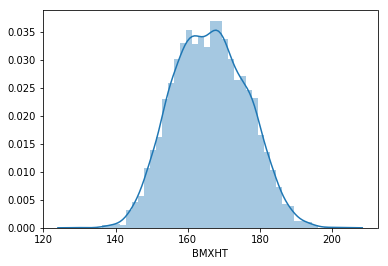

In [9]:
# insert your code here
sns.distplot(df.BMXHT.dropna(), bins=None)
plt.show()

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

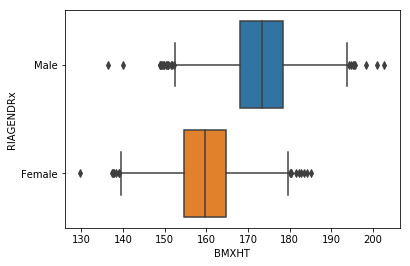

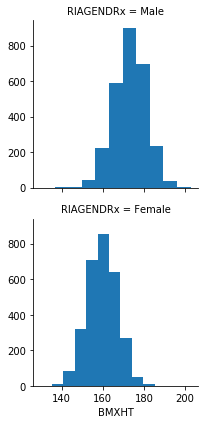

In [10]:
sns.boxplot(x = df["BMXHT"], y = df["RIAGENDRx"])
g = sns.FacetGrid(df, row = "RIAGENDRx")
g = g.map(plt.hist, "BMXHT")
plt.show()

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

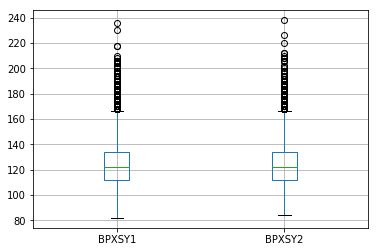

In [11]:
# insert your code here
x = df[["BPXSY1", "BPXSY2"]]
x.boxplot()

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [48]:
# insert your code here
dx=df.groupby(["BPXSY1", "BPXSY2"]).min()#["RIAGENDRx"].value_counts()
dx["RIAGENDR"].value_counts().sum()

635

__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

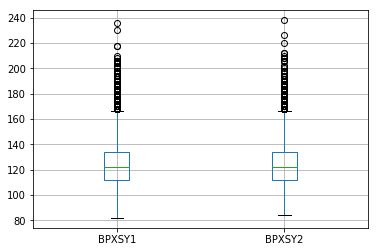

In [50]:
# insert your code here
x = df[["BPXSY1", "BPXSY2"]]
x.boxplot()

__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [14]:
# insert your code here

df["DMDEDUC2X"] = df.DMDEDUC2.replace({1: "Less than 9th grade", 2: "9-11th grade", 3: "High school graduate", 4: "Some college", 5: "College graduate or above", 
                                       7: "Refused", 9: "Don't Know"}).fillna("Missing")
dx = df.groupby(["DMDEDUC2X"])["DMDHHSIZ"].value_counts().unstack()
dx = dx.apply(lambda x: x/x.sum(), axis=1)
print(dx.to_string(float_format="%.2f"))

DMDHHSIZ                     1    2    3    4    5    6    7
DMDEDUC2X                                                   
9-11th grade              0.12 0.22 0.16 0.15 0.15 0.11 0.09
College graduate or above 0.14 0.35 0.19 0.17 0.10 0.03 0.03
Don't Know                 NaN 0.67  NaN  NaN 0.33  NaN  NaN
High school graduate      0.15 0.27 0.17 0.16 0.11 0.07 0.07
Less than 9th grade       0.11 0.22 0.15 0.13 0.15 0.11 0.13
Missing                   0.01 0.08 0.21 0.23 0.19 0.13 0.15
Some college              0.15 0.27 0.19 0.17 0.12 0.05 0.05


__Q5a.__ Comment on any major differences among the distributions.

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [15]:
# insert your code here

## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [16]:
# insert your code here

__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [17]:
# insert your code here

__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.